In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("datasets/07/imdb/IMDB Dataset.csv")

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
data["label"] = (data["sentiment"] == "positive").astype(int)

In [6]:
data

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [7]:
from sklearn.model_selection import train_test_split
train_full, test = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
train, valid = train_test_split(train_full, test_size=0.2, random_state=42)

In [9]:
train.shape

(32000, 3)

In [10]:
valid.shape

(8000, 3)

In [11]:
test.shape

(10000, 3)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [13]:
pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=10000)),
    ('tfidf', TfidfTransformer()),
])

In [14]:
X_train = pipeline.fit_transform(train["review"]).todense()

In [15]:
y_train = train["label"]

In [16]:
X_valid = pipeline.transform(valid["review"]).todense()
y_valid = valid["label"]

In [17]:
X_test = pipeline.transform(test["review"]).todense()
y_test = test["label"]

### Model 

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [20]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1000/1000 [==============================] - 4s 3ms/step - loss: 0.4649 - accuracy: 0.7967 - val_loss: 0.2515 - val_accuracy: 0.8994
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1996 - accuracy: 0.9220 - val_loss: 0.2601 - val_accuracy: 0.8976
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1822 - accuracy: 0.9302 - val_loss: 0.2589 - val_accuracy: 0.8989
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1720 - accuracy: 0.9359 - val_loss: 0.2665 - val_accuracy: 0.8957
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1613 - accuracy: 0.9407 - val_loss: 0.2766 - val_accuracy: 0.8930
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1566 - accuracy: 0.9430 - val_loss: 0.2816 - val_accuracy: 0.8907
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1533 - accuracy: 0.9445 - val_loss: 0.2874 - val_ac

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 1.4245 - val_accuracy: 0.8500
Epoch 58/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 1.4448 - val_accuracy: 0.8506
Epoch 59/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0148 - accuracy: 0.9963 - val_loss: 1.5151 - val_accuracy: 0.8551
Epoch 60/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 1.5894 - val_accuracy: 0.8528
Epoch 61/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 1.6036 - val_accuracy: 0.8525
Epoch 62/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 1.7054 - val_accuracy: 0.8547
Epoch 63/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 1.7735 - val_accuracy

<AxesSubplot:>

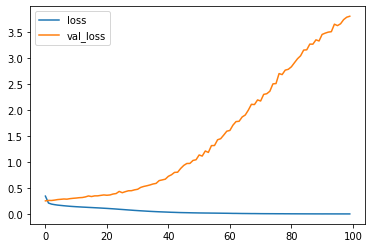

In [22]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()